## Student Performance Indicator

#### Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

#### 1) Problem statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

#### 2) Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
stud = pd.read_csv("stud.csv")

In [3]:
# Top 5 records
stud.head() 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape of data
stud.shape

(1000, 8)

#### 2.2 Dataset information

* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

#### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [5]:
stud.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### As observed, this dataset contains no missing values.

#### 3.1 Check Duplicates

In [6]:
stud.duplicated().sum()

0

#### There are no duplicates values in the data set

#### 3.3 Check data types

In [7]:
# Check null and dtypes

stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Checking number of unique values

In [8]:
stud.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### Check statistics of dataset

In [9]:
stud.describe(include='all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


#### Insights

* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17
* From mean and standard deviation of Maths, it is clear that students has scored lesser in maths and there is more variance in the scores than reading or writing.

#### 3.7 Exploring data

In [10]:
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(stud['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(stud['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(stud['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(stud['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(stud['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in stud.columns if stud[feature].dtype != 'O']
categorical_features = [feature for feature in stud.columns if stud[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 3.8 Creating column "Total" and "Average"

In [13]:
stud['total_score'] = stud['math_score'] + stud['reading_score'] + stud['writing_score']
stud['avg_score'] = stud['total_score']/3
stud.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_FM = stud[stud['reading_score']==100]['avg_score'].count()
writing_FM = stud[stud['writing_score']==100]['avg_score'].count()
math_FM = stud[stud['math_score']==100]['avg_score'].count()

print(f'Number of students with full marks in Maths: {math_FM}')
print(f'Number of students with full marks in Writing: {writing_FM}')
print(f'Number of students with full marks in Reading: {reading_FM}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20 = stud[stud['reading_score'] <= 20]['avg_score'].count()
writing_less_20 = stud[stud['writing_score'] <= 20]['avg_score'].count()
math_less_20 = stud[stud['math_score'] <= 20]['avg_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights

* From above values we get students have performed the worst in Maths
* Best performance is in reading section

#### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

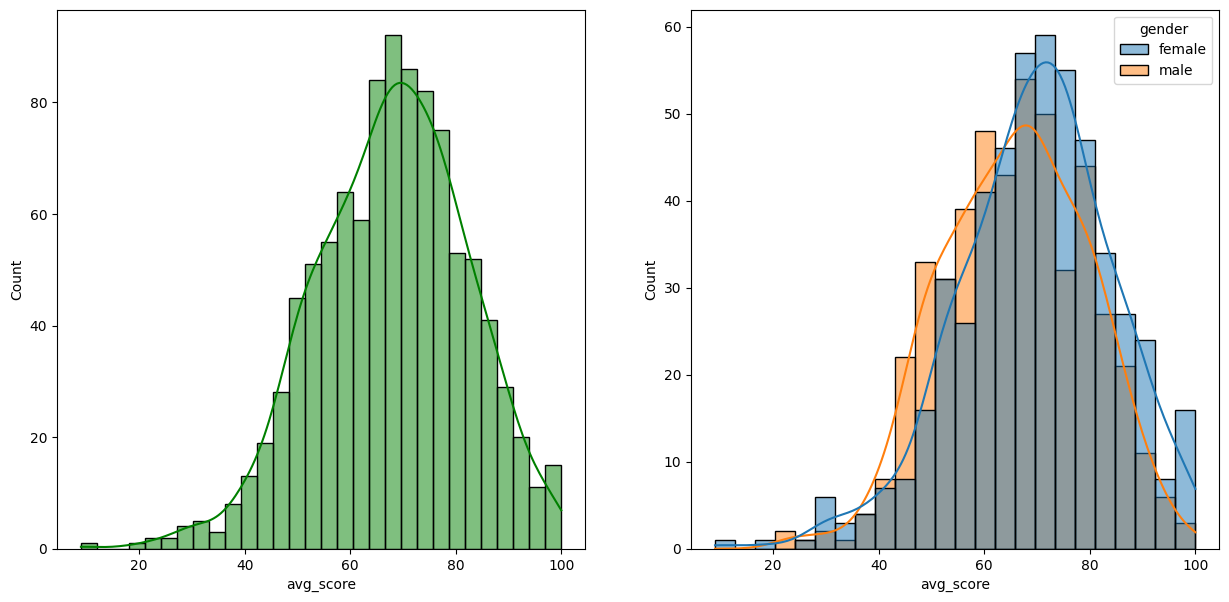

In [16]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=stud,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=stud,x='avg_score',kde=True,hue='gender')
plt.show()

#### Female student performed well compared to male students

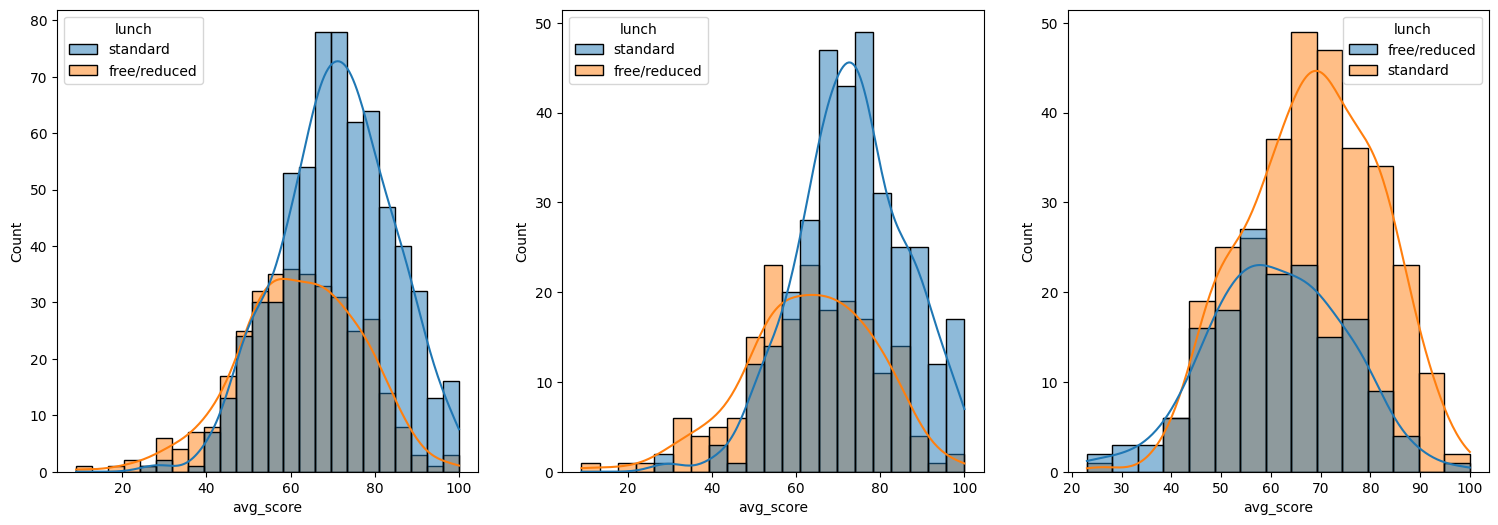

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=stud,x='avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=stud[stud.gender=='female'],x='avg_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=stud[stud.gender=='male'],x='avg_score',kde=True,hue='lunch')
plt.show()

#### Insights
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

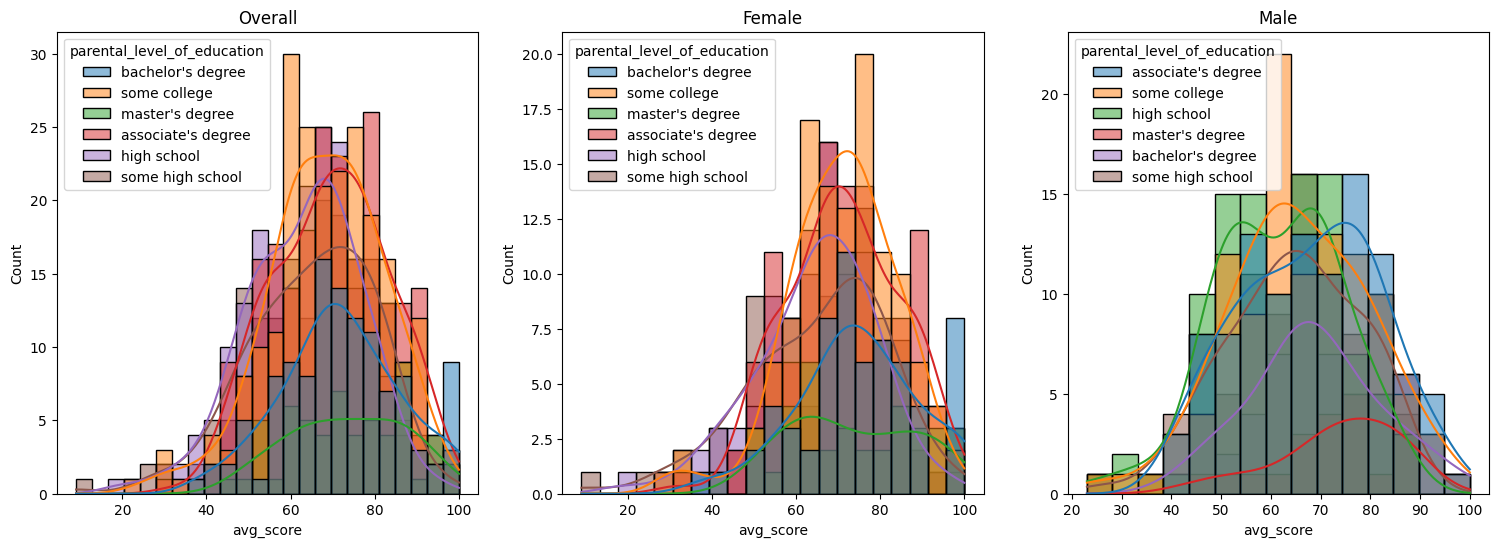

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=stud,x='avg_score',kde=True,hue='parental_level_of_education').set(title = 'Overall')
plt.subplot(142)
sns.histplot(data=stud[stud.gender=='female'],x='avg_score',kde=True,hue='parental_level_of_education').set(title = 'Female')
plt.subplot(143)
sns.histplot(data=stud[stud.gender=='male'],x='avg_score',kde=True,hue='parental_level_of_education').set(title = 'Male')
plt.show()

#### Insights

* In general parent's education don't help student perform well in exam.
* 2nd plot we can see there is no effect of parent's education on female students.
* 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.

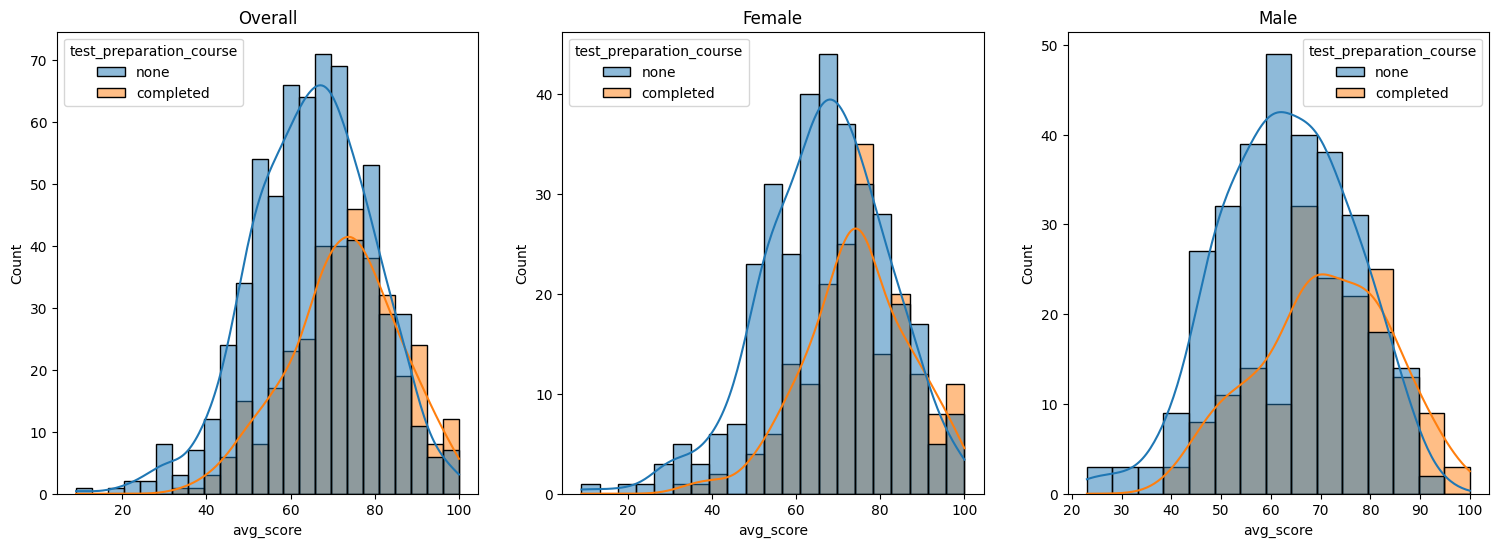

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=stud,x='avg_score',kde=True,hue='test_preparation_course').set(title = 'Overall')
plt.subplot(142)
sns.histplot(data=stud[stud.gender=='female'],x='avg_score',kde=True,hue='test_preparation_course').set(title = 'Female')
plt.subplot(143)
sns.histplot(data=stud[stud.gender=='male'],x='avg_score',kde=True,hue='test_preparation_course').set(title = 'Male')
plt.show()

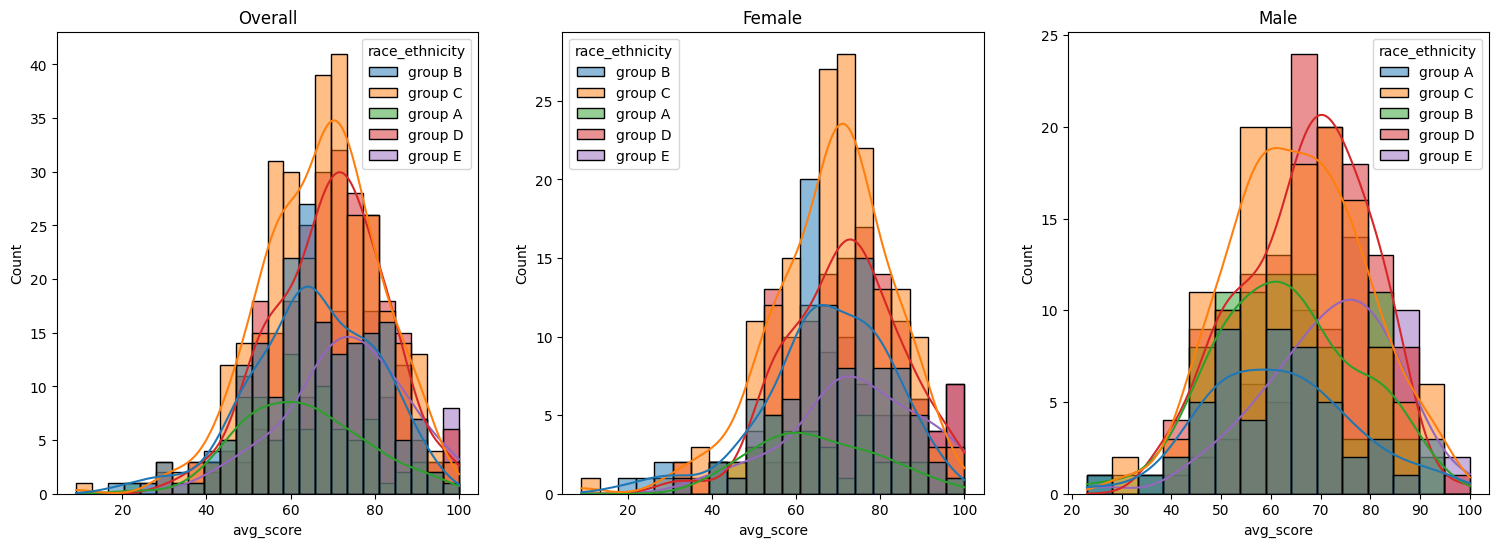

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=stud,x='avg_score',kde=True,hue='race_ethnicity').set(title = 'Overall')
plt.subplot(142)
sns.histplot(data=stud[stud.gender=='female'],x='avg_score',kde=True,hue='race_ethnicity').set(title = 'Female')
plt.subplot(143)
sns.histplot(data=stud[stud.gender=='male'],x='avg_score',kde=True,hue='race_ethnicity').set(title = 'Male')
plt.show()

#### Insights

* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

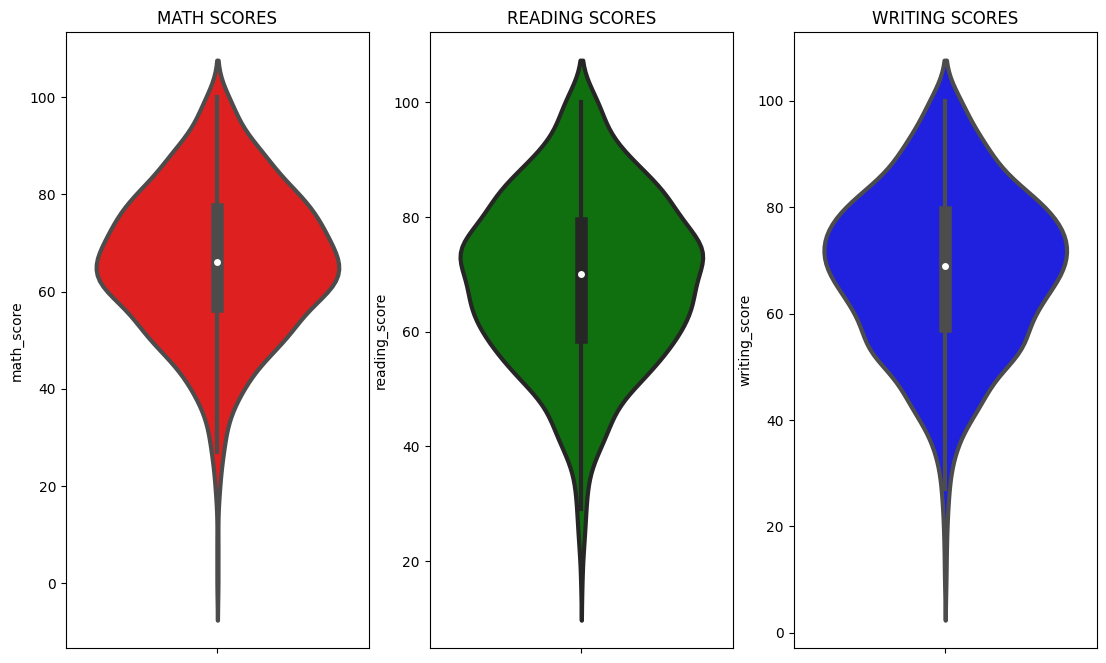

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=stud,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=stud,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=stud,color='blue',linewidth=3)
plt.show()

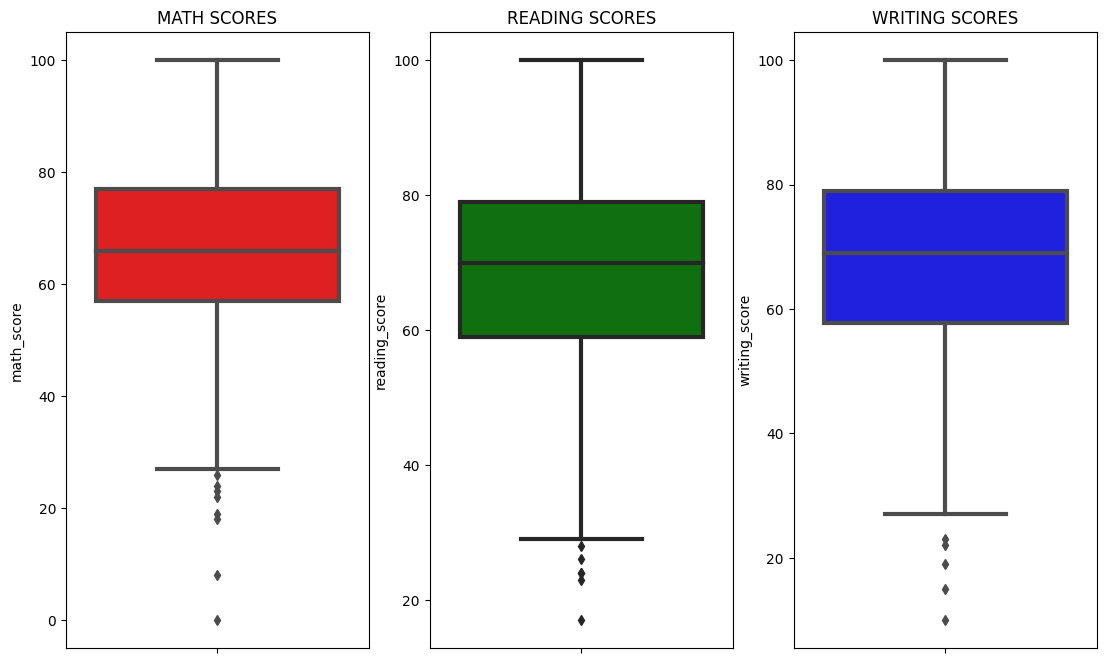

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=stud,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=stud,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=stud,color='blue',linewidth=3)
plt.show()

#### Insights

* For all subjects, most of the students scored between 60-80.
* In Maths students tend to score closer to 60.
* For reading and writing the distribution seems to be quite equal.

#### 4.3 Multivariate analysis using pieplot

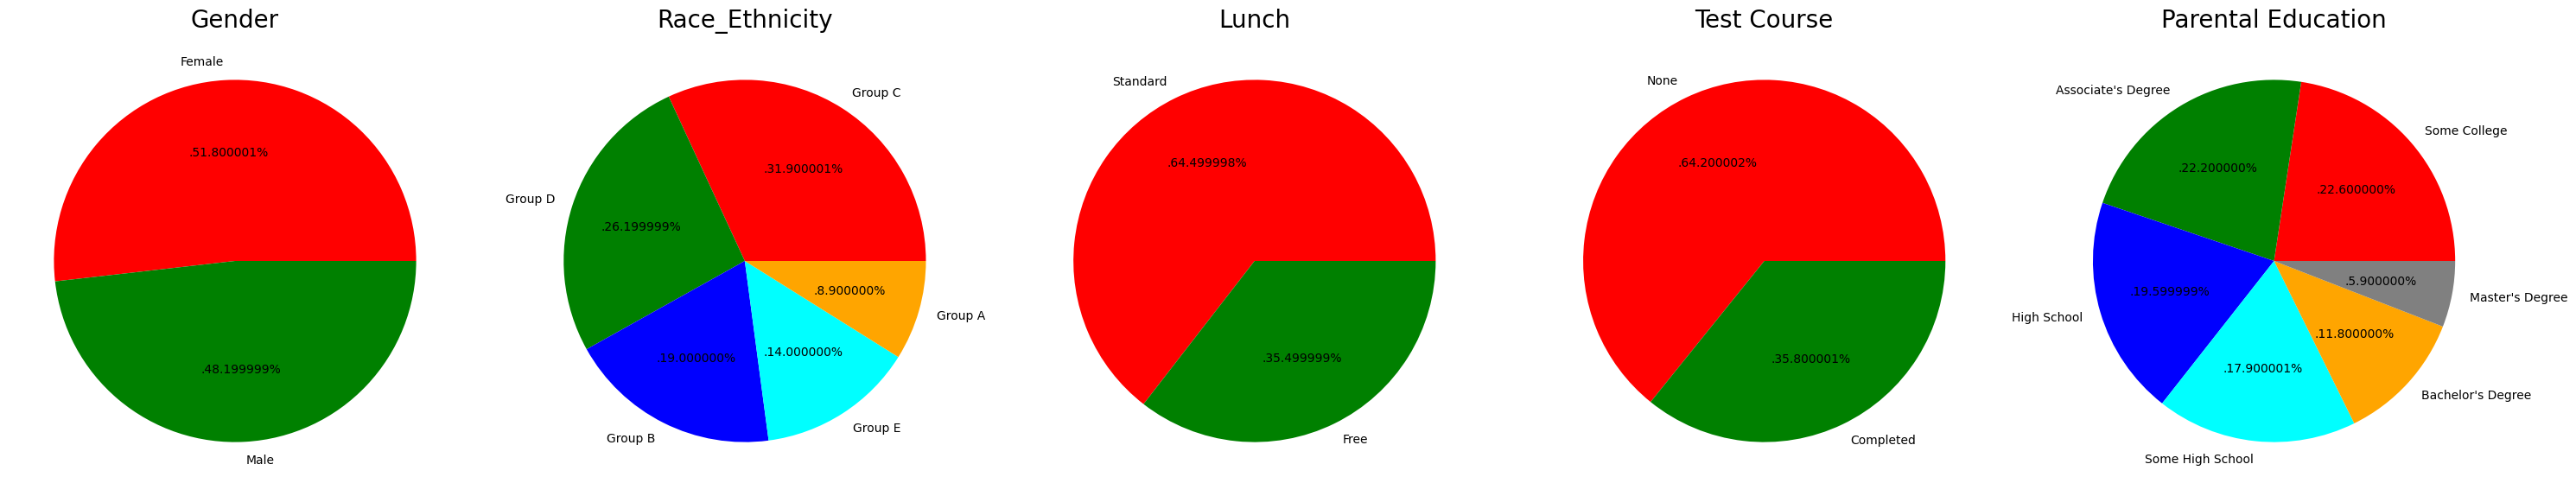

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1 , 5, 1)
size = stud['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = stud['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = stud['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = stud['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = stud['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights

* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN

* How is distribution of Gender ?

* Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

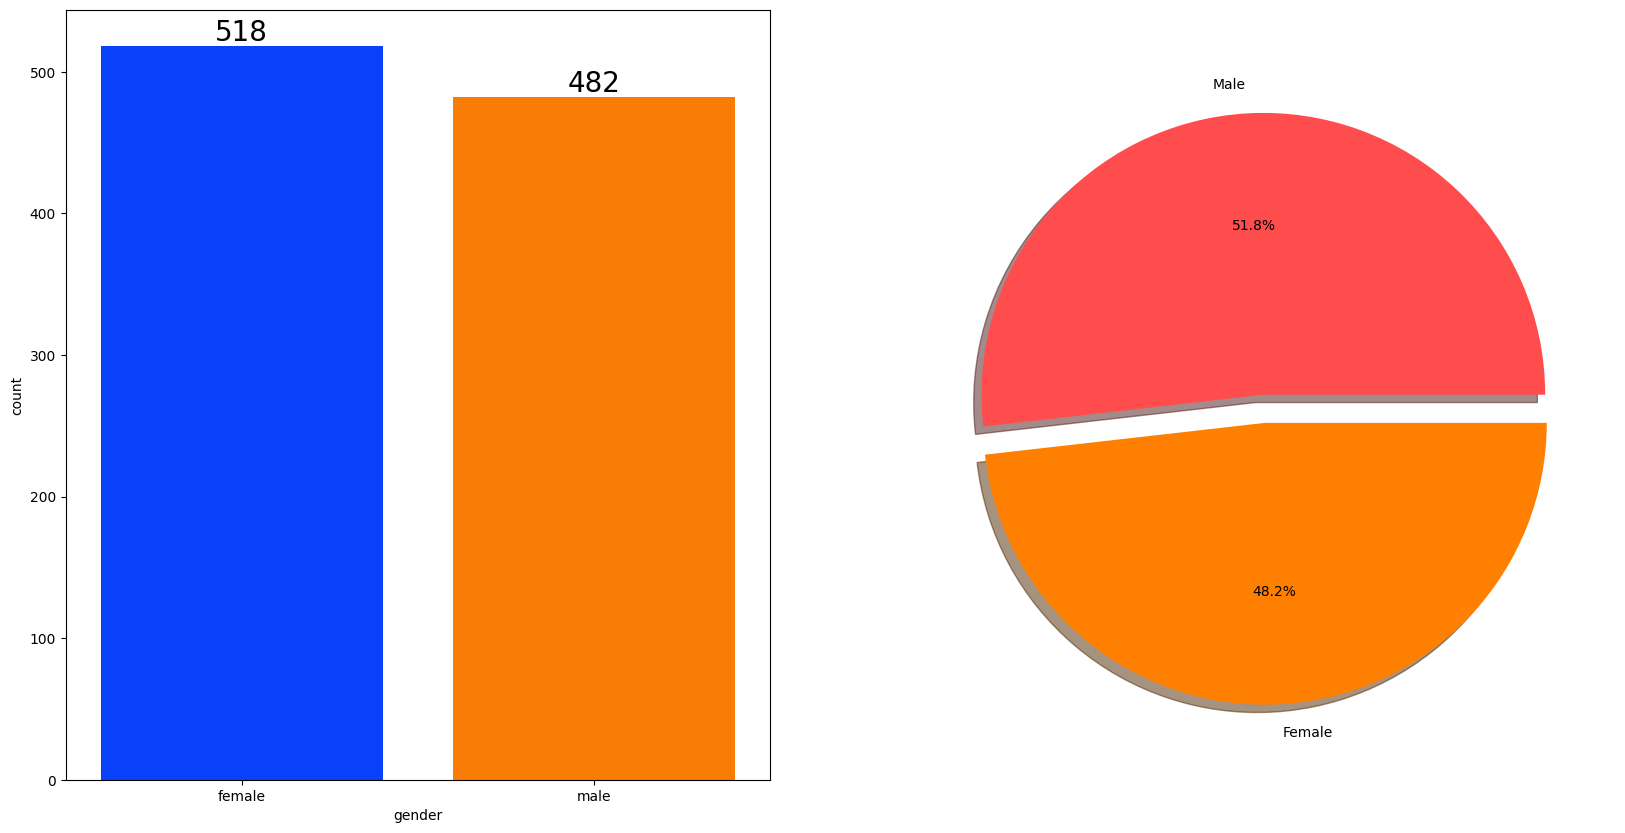

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=stud['gender'],data=stud,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=stud['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights

* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [25]:
gender_group = stud.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


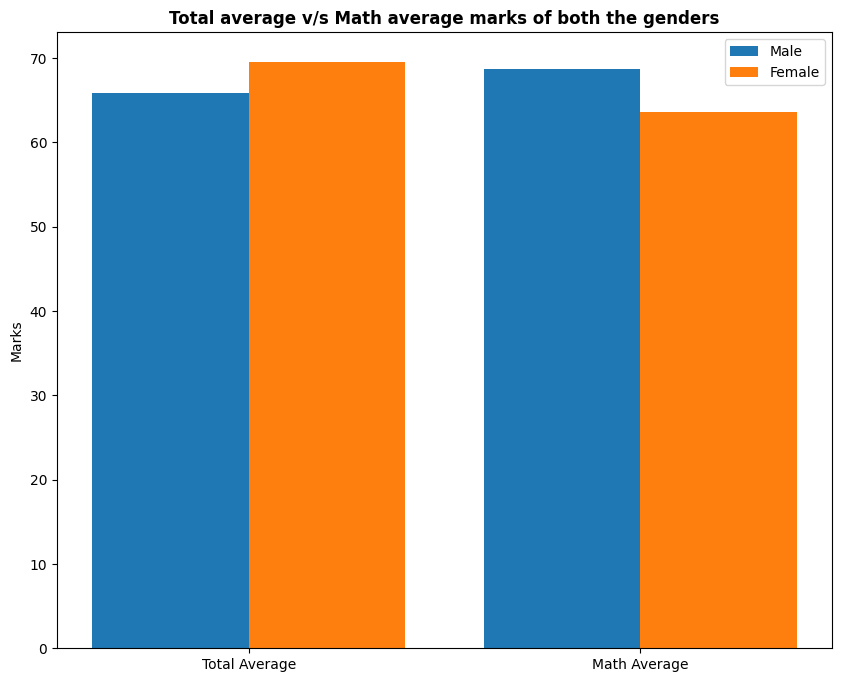

In [27]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights

* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN

* How is Group wise distribution ?
* Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

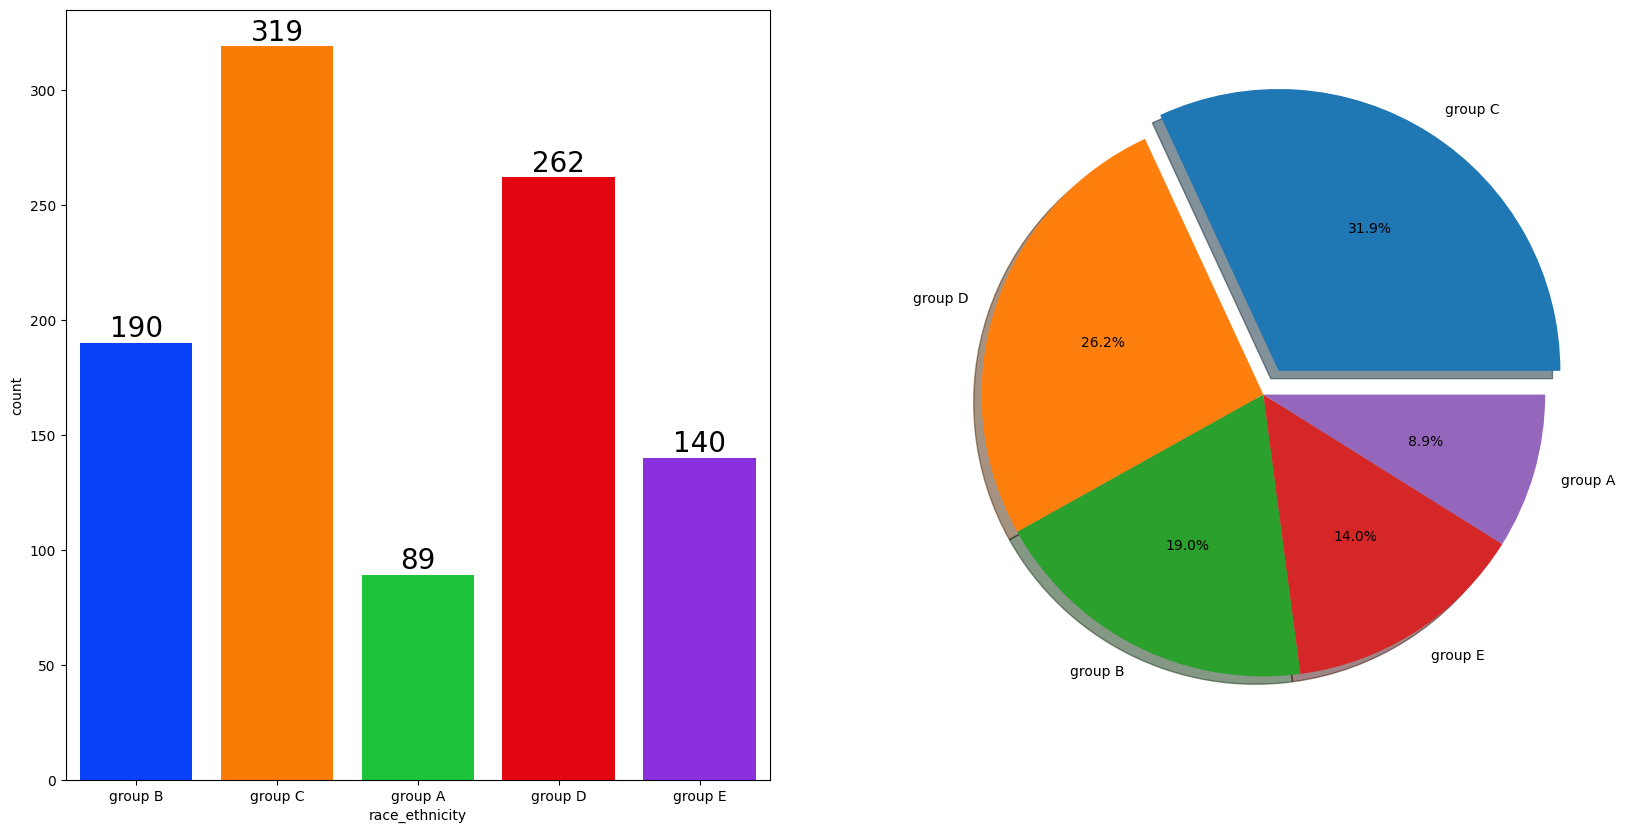

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=stud['race_ethnicity'],data=stud,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = stud['race_ethnicity'].value_counts(),labels=stud['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

#### Insights

* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

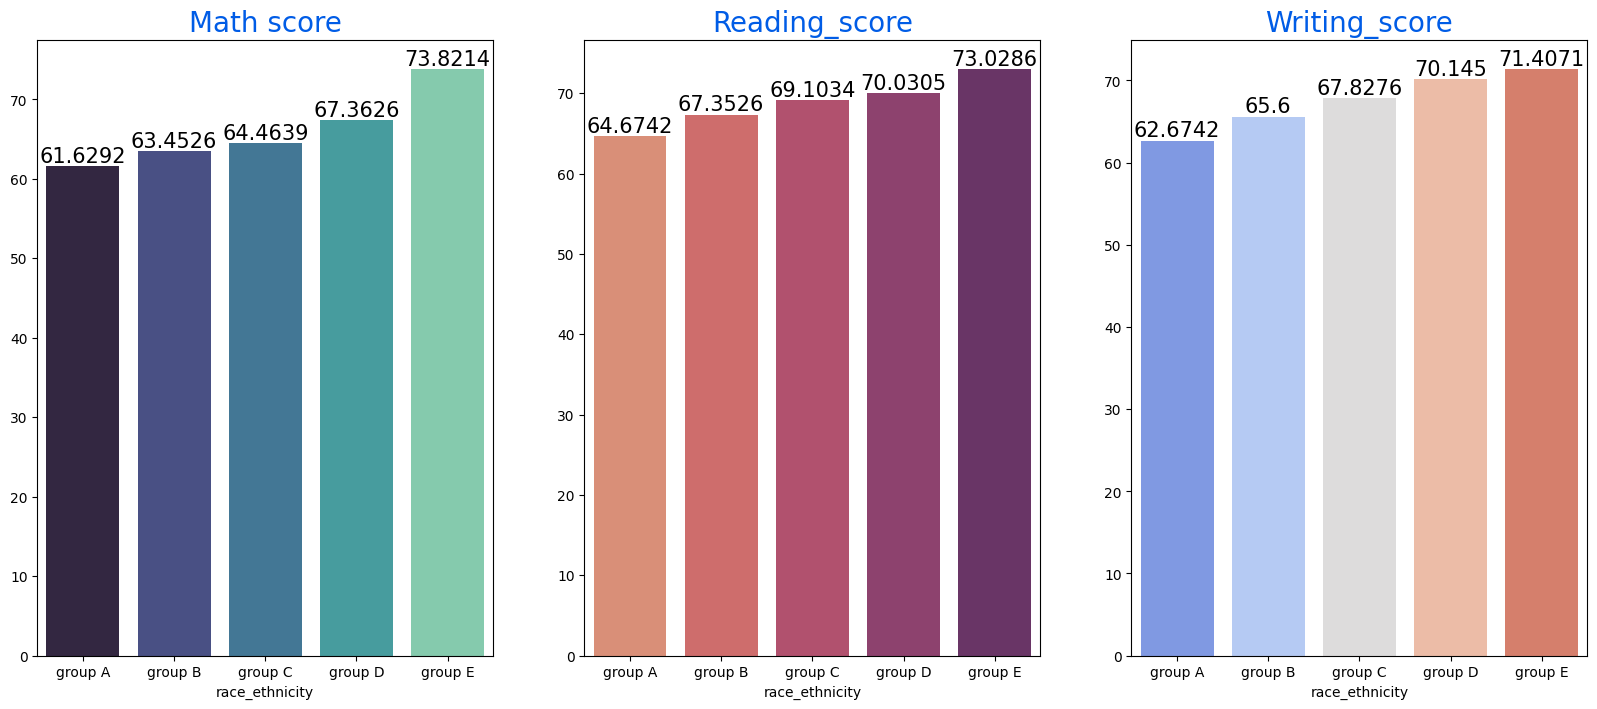

In [34]:
Group_data2=stud.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights

* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

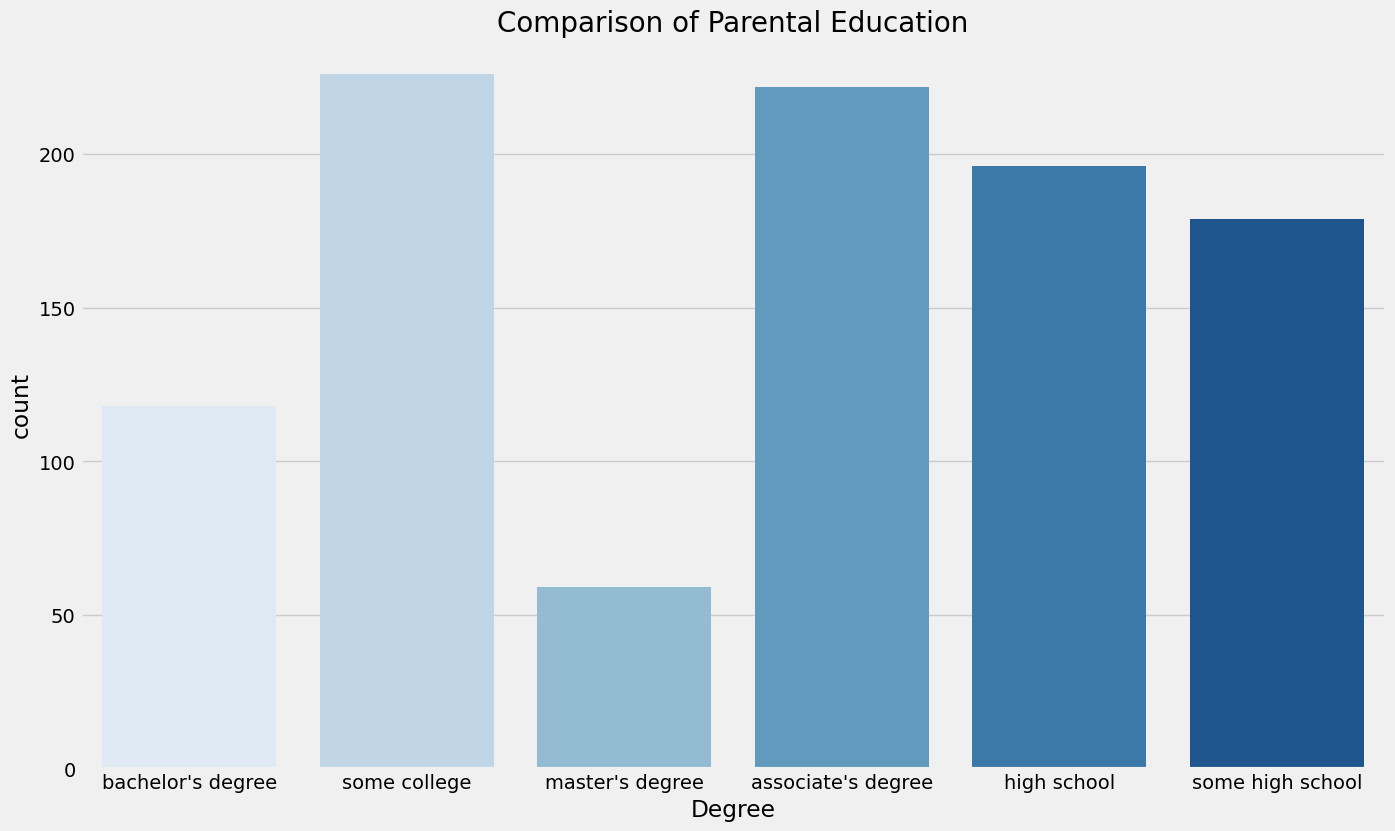

In [37]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(stud['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights

* Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

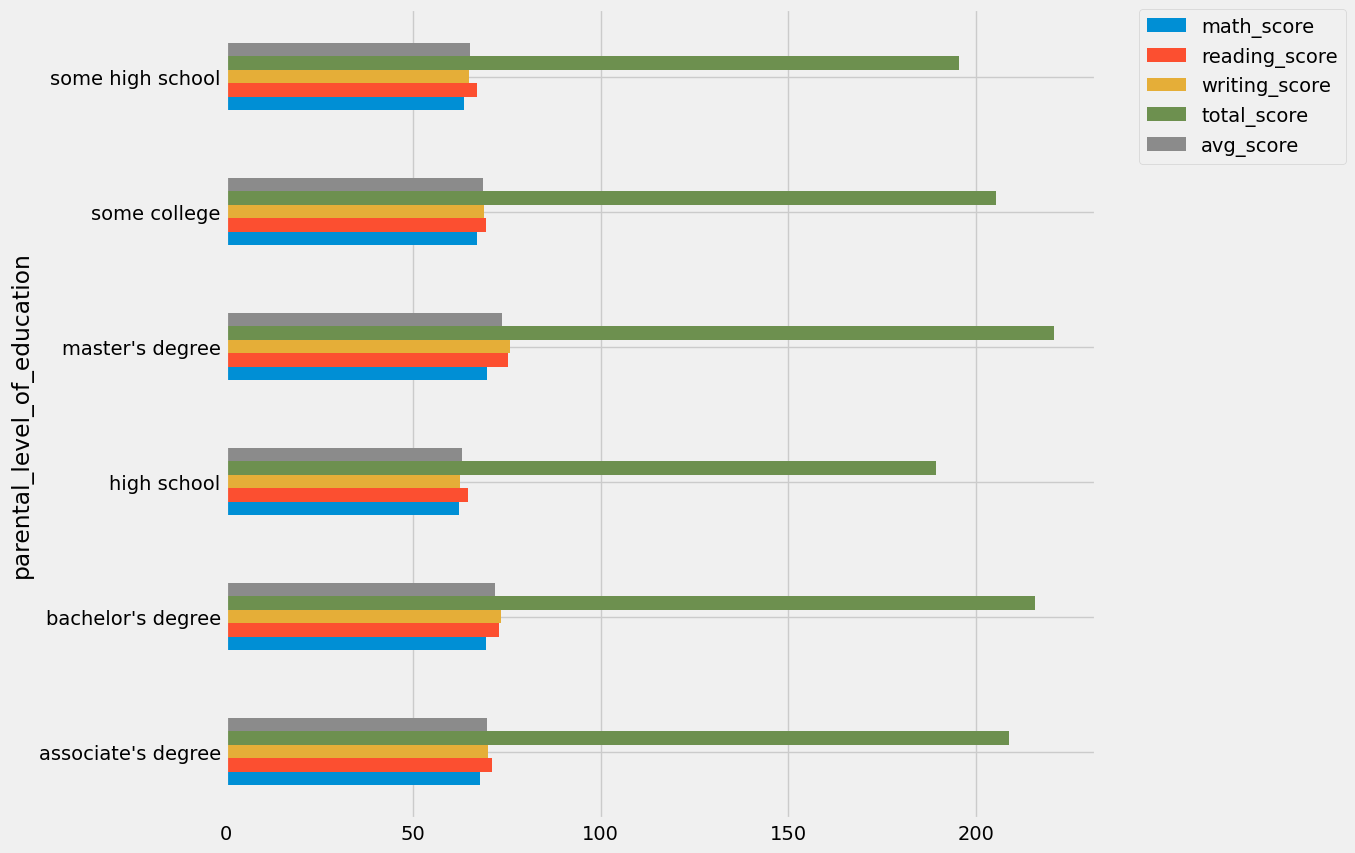

In [39]:
stud.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights

* The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN

* Which type of lunch is most common amoung students ?
* What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

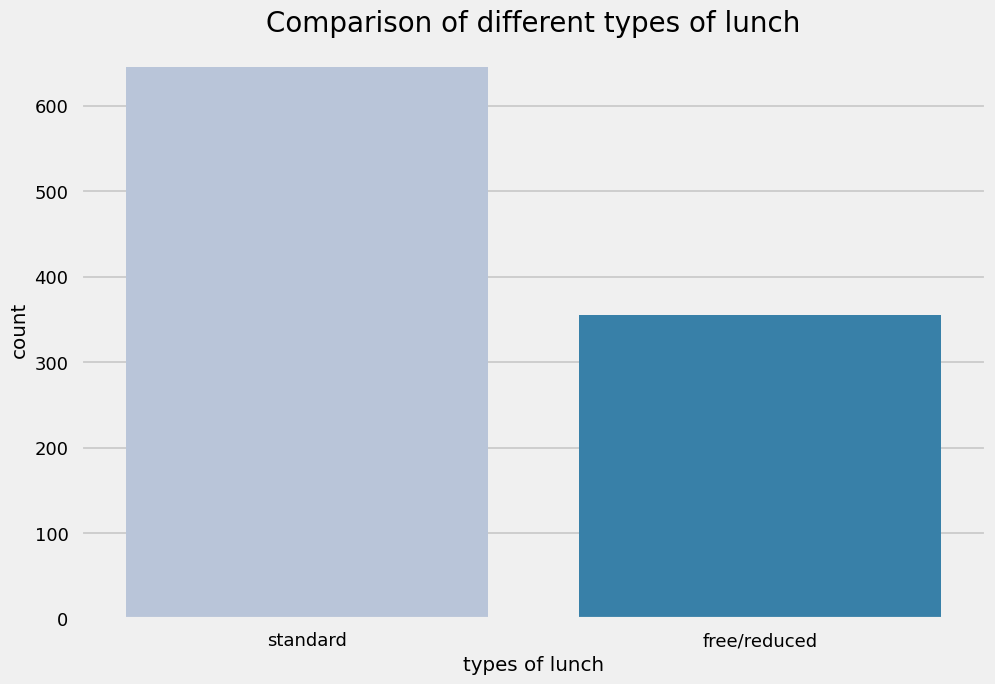

In [40]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(stud['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights

* Insights
Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

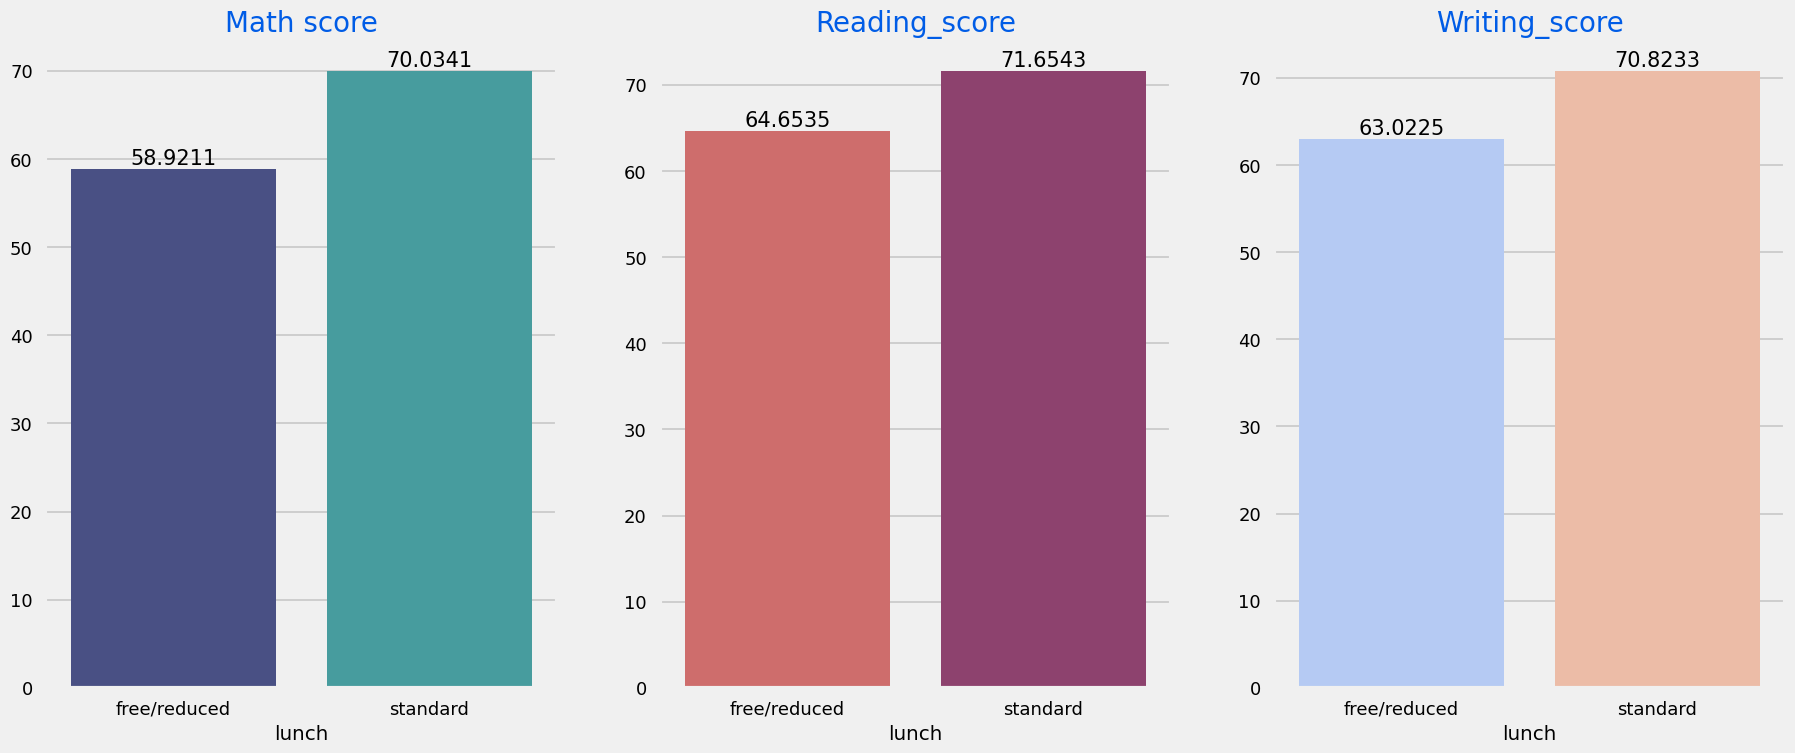

In [47]:
Group_data2=stud.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights

* Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN

* Which type of test is most common amoung students ?
* Is Test prepration course has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

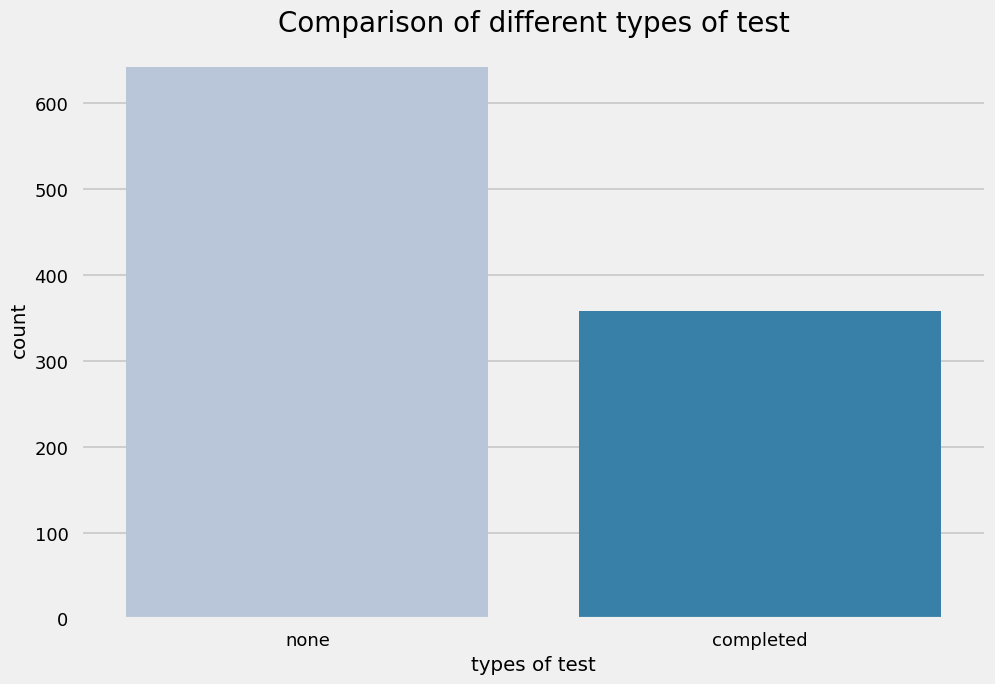

In [51]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(stud['test_preparation_course'], palette = 'PuBu')
plt.title('Comparison of different types of test', fontweight = 30, fontsize = 20)
plt.xlabel('types of test')
plt.ylabel('count')
plt.show()

#### Insights

* Students did not complete any course was more than who had completed

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

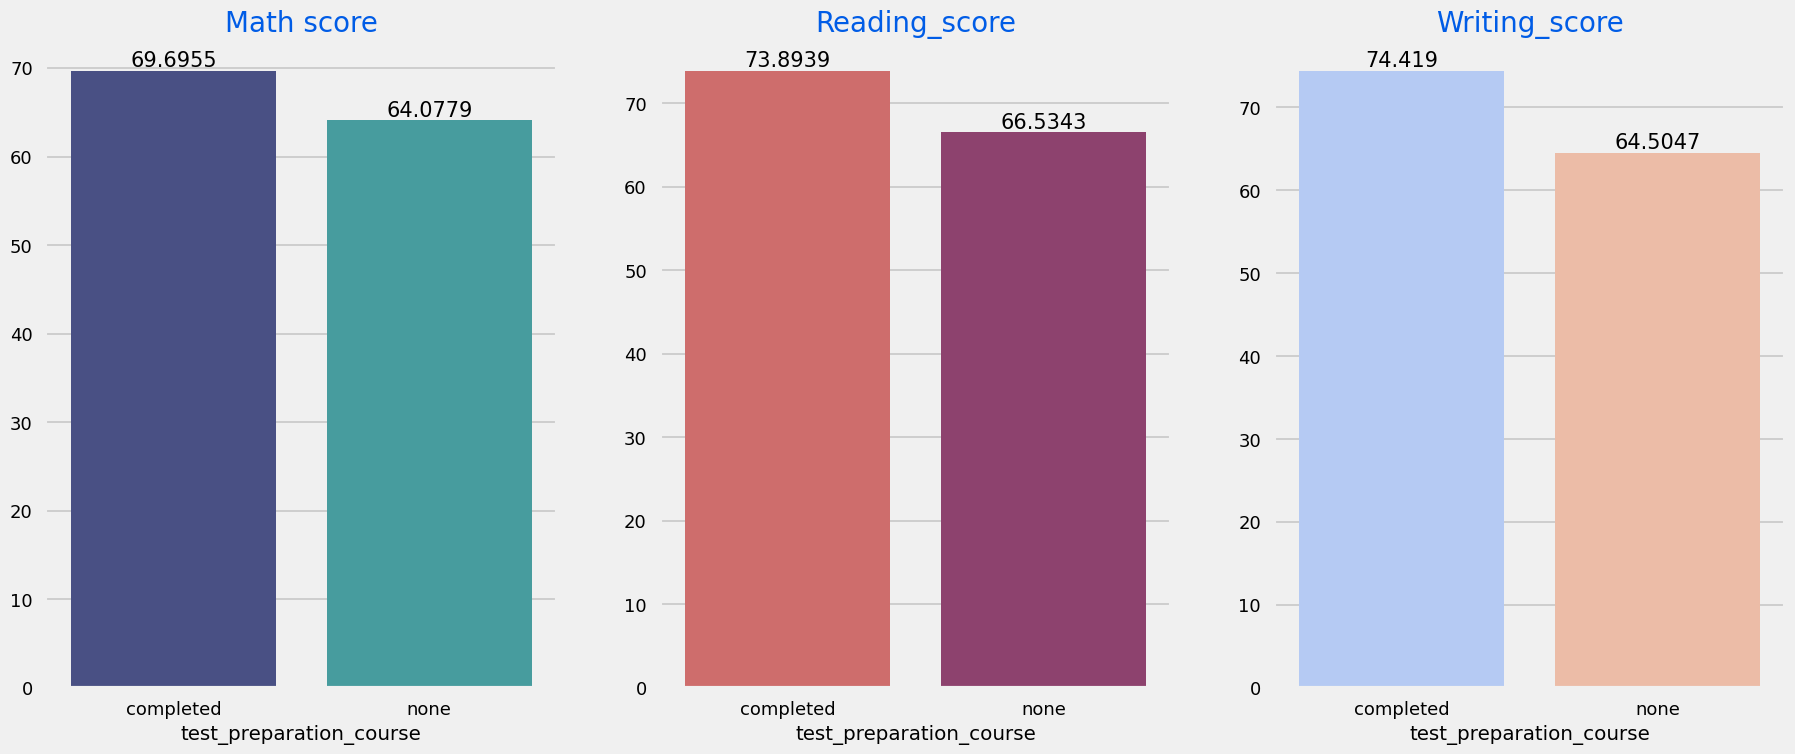

In [52]:
Group_data2=stud.groupby('test_preparation_course')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### 4.4.6 CHECKING OUTLIERS

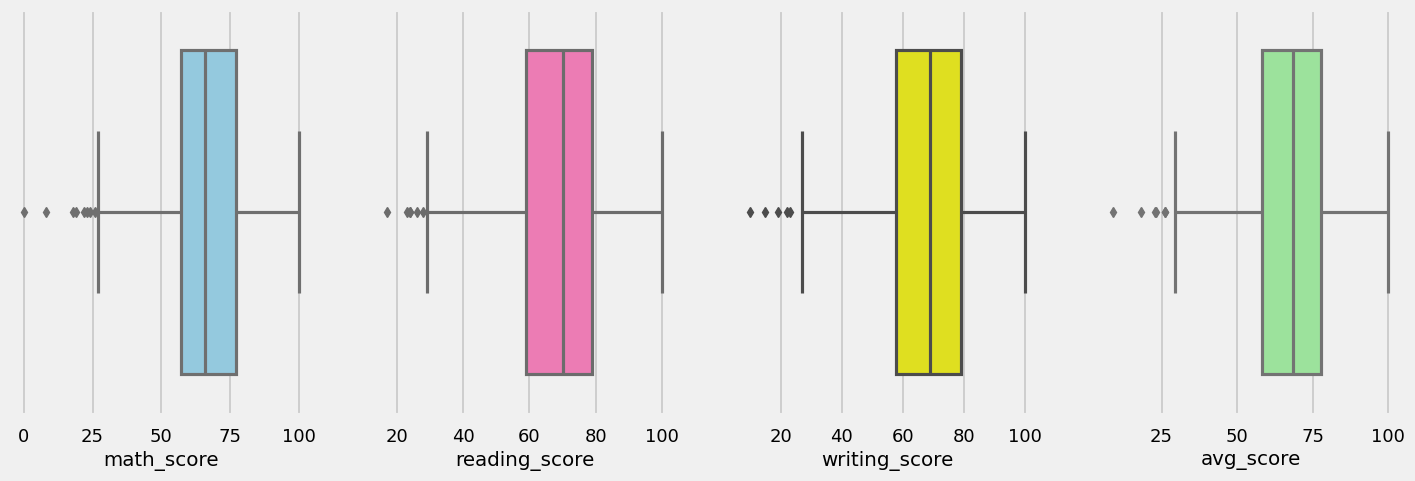

In [53]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(stud['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(stud['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(stud['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(stud['avg_score'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

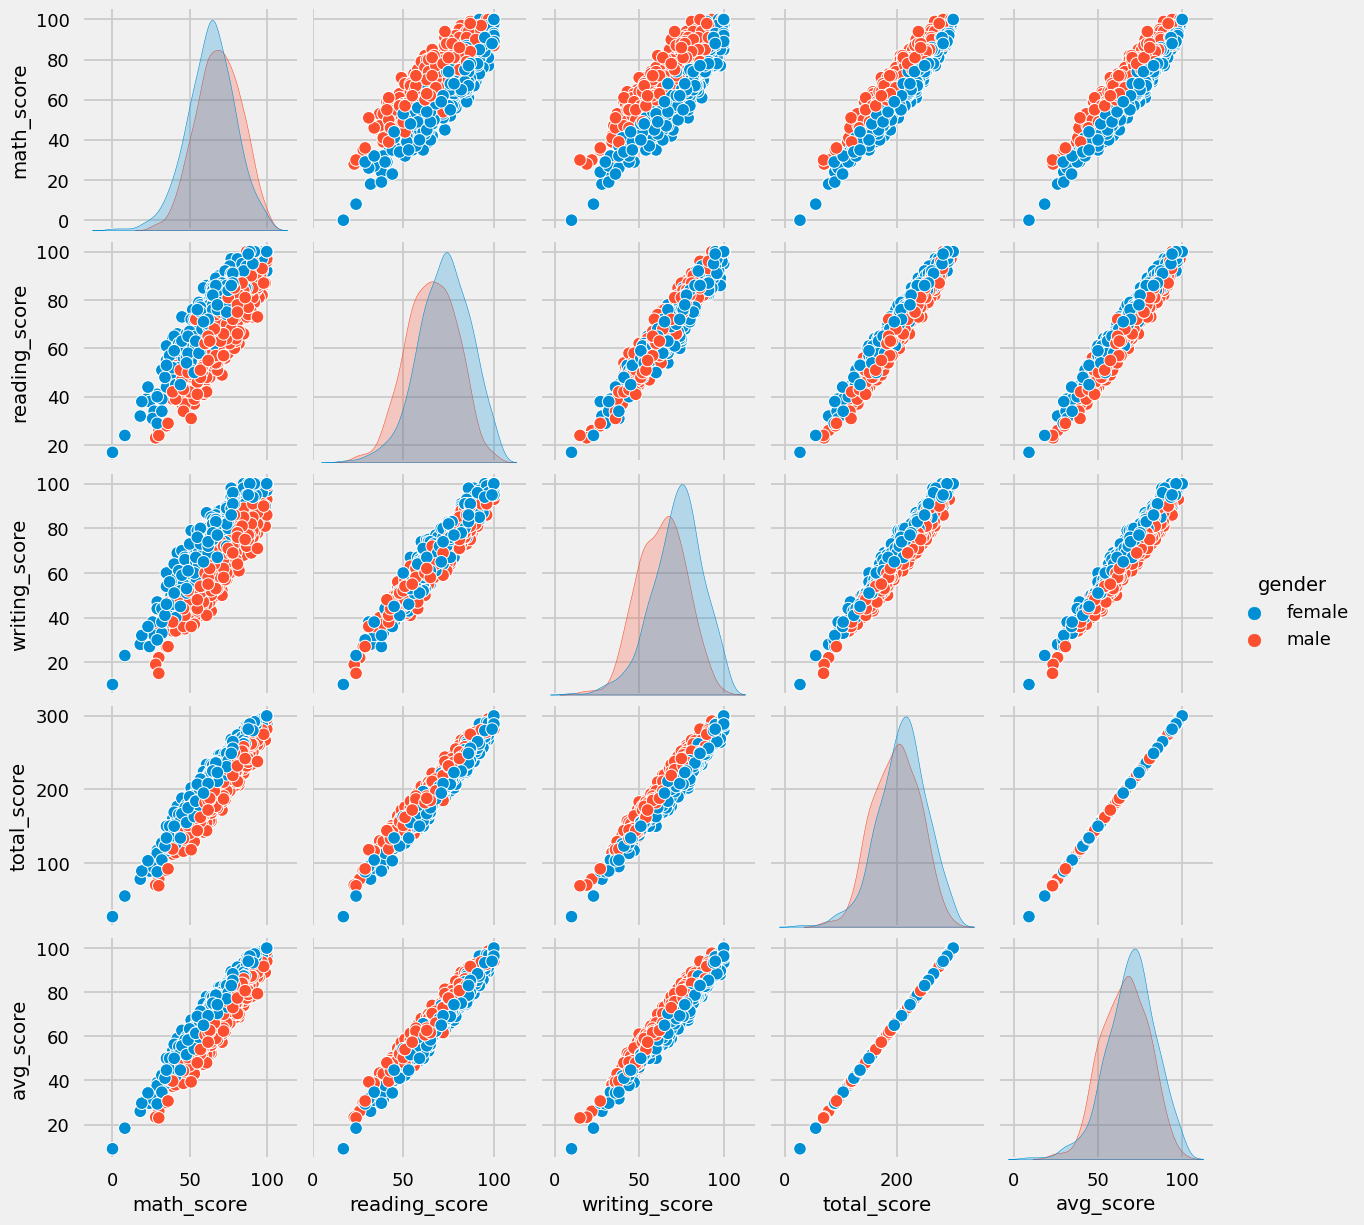

In [54]:
sns.pairplot(stud,hue = 'gender')
plt.show()

#### Insights

* From the above plot it is clear that all the scores increase linearly with each other.

#### 5. Conclusions

* Student's Performance is related with lunch, race, parental level education.
* Females lead in pass percentage and also are top-scorers.
* Student's Performance is not much related with test preparation course.
* Finishing preparation course is benefitial.